# **1. Perkenalan Dataset**


Dataset yang saya gunakan dalam proyek ini adalah dataset Air Quality and Pollution Assessment yang berisi data pengukuran kualitas udara dan tingkat polusi yang diambil dari berbagai lokasi dan waktu yang berbeda. Dataset mencakup berbagai parameter penting yang berhubungan dengan kualitas udara, seperti konsentrasi partikel PM2.5, PM10, gas-gas polutan (CO, NO2, SO2, O3), serta indikator lingkungan lainnya seperti suhu dan kelembapan. Data ini sangat berguna untuk analisis tren polusi udara, pemodelan kualitas udara, dan pengembangan sistem peringatan dini terkait kondisi lingkungan yang berdampak pada kesehatan masyarakat.

Dataset ini bersumber dari Kaggle, dengan link asli berikut:
https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment/data

Dataset tersebut disediakan oleh pengguna Kaggle bernama Mujtaba Matin, yang mengumpulkan dan mengolah data kualitas udara untuk tujuan penelitian dan pengembangan aplikasi terkait lingkungan dan kesehatan.

# **2. Import Library**

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **3. Memuat Dataset**

In [8]:
# Pastikan path file sudah benar, gunakan path relatif atau absolut yang sesuai
df = pd.read_csv('../updated_pollution_dataset_raw/updated_pollution_dataset.csv')
df.head()

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [9]:
# Menampilkan informasi dataset
print('\nInformasi Dataset:')
df.info()


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


In [10]:
# Menampilkan statistik deskriptif
print('\nStatistik Deskriptif:')
df.describe()


Statistik Deskriptif:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000
max,58.600000,128.100000,295.000000,315.800000,64.900000,44.900000,3.720000,25.800000,957.000000


In [11]:
# Pemeriksaan missing values
print('Pemeriksaan Missing Values:')
print(df.isnull().sum())

Pemeriksaan Missing Values:
Temperature                      0
Humidity                         0
PM2.5                            0
PM10                             0
NO2                              0
SO2                              0
CO                               0
Proximity_to_Industrial_Areas    0
Population_Density               0
Air Quality                      0
dtype: int64


In [12]:
# Pemeriksaan duplikasi
print('Pemeriksaan Duplikasi:')
print(df.duplicated().sum())

Pemeriksaan Duplikasi:
0


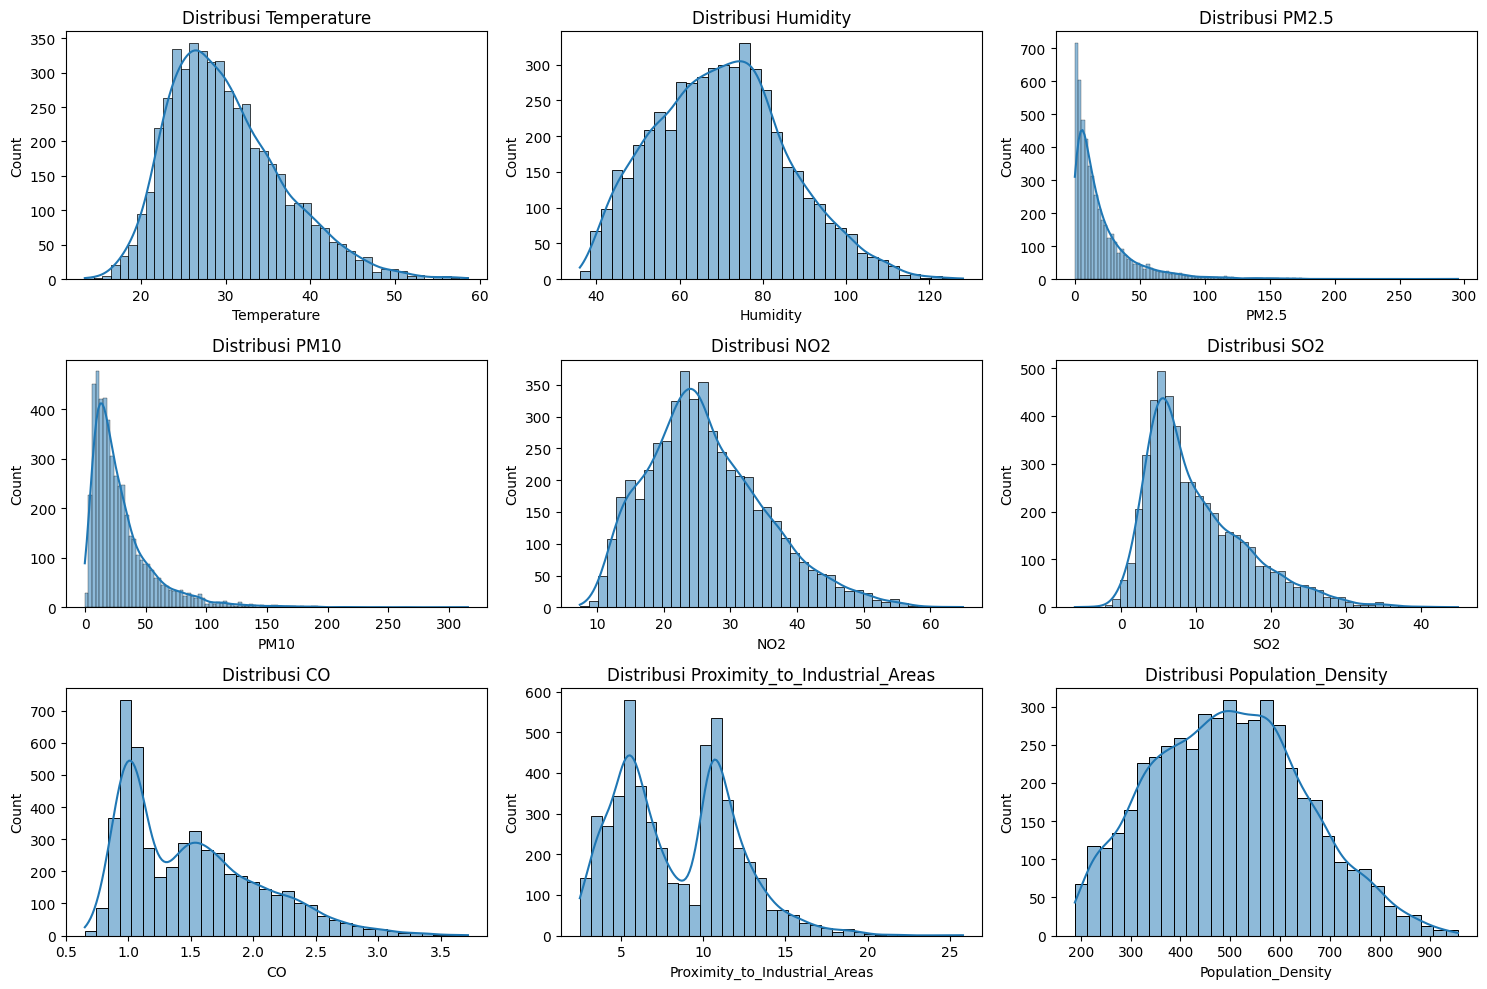

In [13]:
# Visualisasi distribusi fitur numerik
numerical_cols = ['Temperature', 'Humidity', 'PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Proximity_to_Industrial_Areas', 'Population_Density']
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

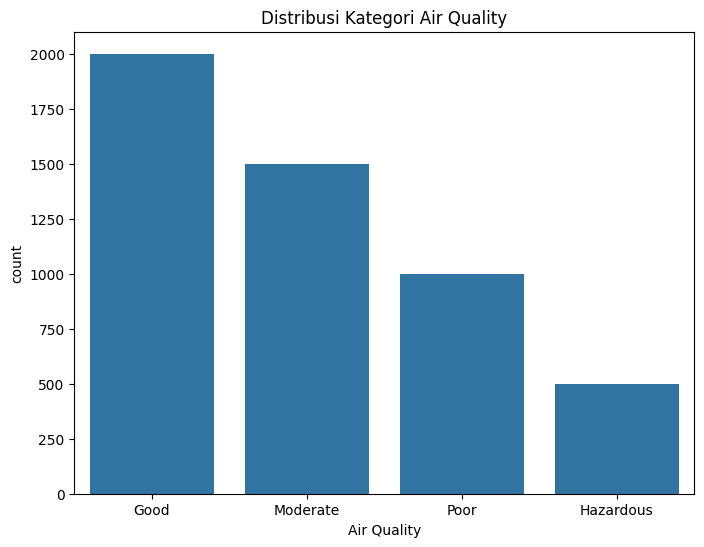

In [14]:
# Visualisasi distribusi Air Quality
plt.figure(figsize=(8, 6))
sns.countplot(x='Air Quality', data=df, order=['Good', 'Moderate', 'Poor', 'Hazardous'])
plt.title('Distribusi Kategori Air Quality')
plt.show()

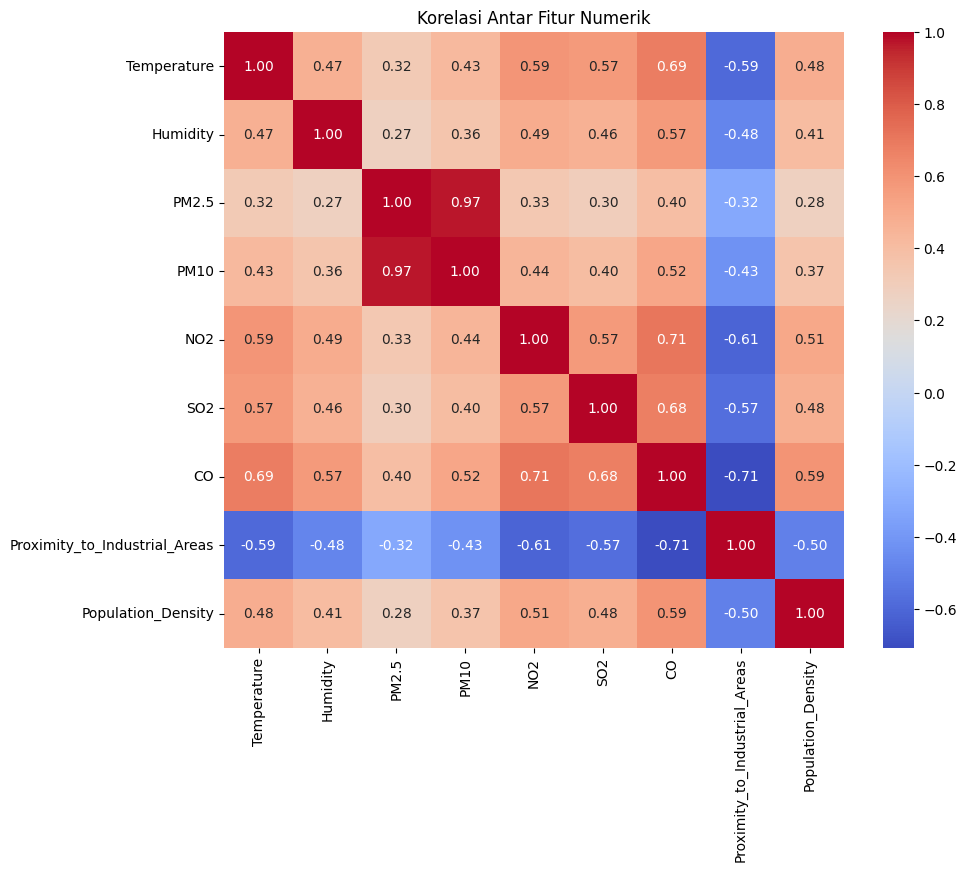

In [15]:
# Pemeriksaan korelasi antar fitur numerik
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi Antar Fitur Numerik')
plt.show()

In [16]:
# Pemeriksaan nilai negatif pada SO2 dan PM10
print('Jumlah Nilai Negatif pada SO2:', (df['SO2'] < 0).sum())
print('Jumlah Nilai Negatif pada PM10:', (df['PM10'] < 0).sum())

Jumlah Nilai Negatif pada SO2: 30
Jumlah Nilai Negatif pada PM10: 1


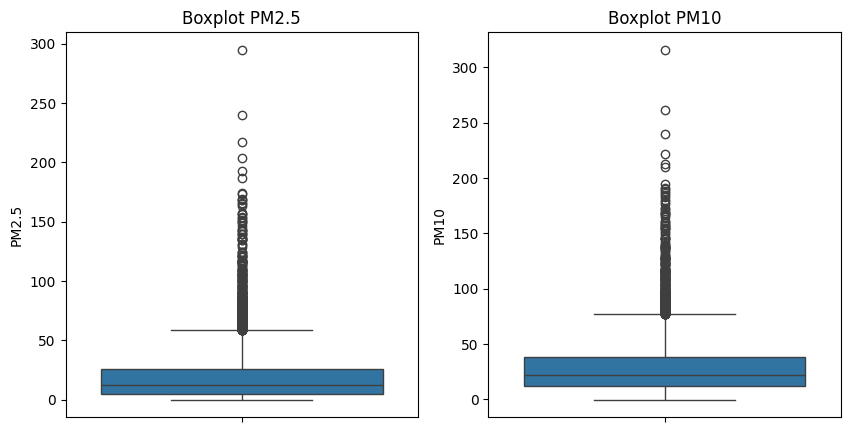

In [17]:
# Pemeriksaan outlier menggunakan boxplot untuk PM2.5 dan PM10
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['PM2.5'])
plt.title('Boxplot PM2.5')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['PM10'])
plt.title('Boxplot PM10')
plt.show()

# **5. Data Preprocessing**

In [21]:
# Mengimpor fungsi preprocess_data
from automate_Zid_irsyadin import preprocess_data

# Menjalankan preprocessing
input_path = '../updated_pollution_dataset_raw/updated_pollution_dataset.csv'
output_path = 'pollution_dataset_preprocessed.csv'
df_processed = preprocess_data(input_path, output_path)

Dataset yang telah diproses disimpan sebagai pollution_dataset_preprocessed.csv


In [22]:
# Menampilkan 5 baris pertama dataset yang telah diproses
print('Lima Baris Pertama Dataset yang Telah Diproses:')
display(df_processed.head())

Lima Baris Pertama Dataset yang Telah Diproses:


,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,0.056277,-0.632559,-0.707415,-0.373317,-0.786771,-0.039260,0.544337,-0.672587,-1.116827,2
1,-0.176829,0.433835,-0.938911,-0.757470,0.611346,0.039291,0.388174,-0.756157,0.841511,2
2,-0.984932,0.375668,1.008849,0.698269,-0.140583,0.494883,0.368654,-0.979012,0.895164,2
3,-0.363315,-1.925157,-0.635571,-1.155103,-1.421210,-0.651952,-0.568323,0.664543,0.439112,0
4,-0.456557,0.117149,-0.571710,-0.501368,-0.434305,-0.604822,-0.841608,1.110253,-1.224133,0
